In [1]:
# Import the required modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the data
dataset_path = 'Data/Airline_Passenger_Satisfaction.csv'
original_data = pd.read_csv(dataset_path)
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)
original_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


## Preprocess Data

In [3]:
#Drop unecessary columns
original_data.drop(["Unnamed: 0","id"],axis=1, inplace=True)


In [4]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [5]:
original_data["Arrival Delay in Minutes"]=original_data["Arrival Delay in Minutes"].fillna(0)

original_data["satisfaction"] = original_data["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0})

original_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1


In [6]:
# Look at the satisfaction value counts
original_data["satisfaction"].value_counts()

satisfaction
0    14573
1    11403
Name: count, dtype: int64

In [7]:
original_data=pd.get_dummies(original_data, columns=["Gender","Customer Type","Type of Travel","Class"]).astype(int)

s_data_scaled = StandardScaler().fit_transform(original_data[["Age","Flight Distance","Departure Delay in Minutes","Arrival Delay in Minutes"]])
s_data_scaled[0:5]


array([[ 0.81788702, -1.03517064,  0.95381034,  0.78220768],
       [-0.23923776,  1.67144329, -0.38228641, -0.39218839],
       [-1.29636255, -1.00312786, -0.38228641, -0.39218839],
       [ 0.28932463,  2.18613052, -0.38228641, -0.23204347],
       [ 0.61967612, -0.01180422, -0.38228641,  0.14162801]])

In [8]:
df_s_scaled=pd.DataFrame(
    s_data_scaled,
    columns=["Age","Flight Distance","Departure Delay in Minutes","Arrival Delay in Minutes"]
)
original_data["Age"] =df_s_scaled["Age"]
original_data["Flight Distance"] =df_s_scaled["Flight Distance"]
original_data["Departure Delay in Minutes"] =df_s_scaled["Departure Delay in Minutes"]
original_data["Arrival Delay in Minutes"] =df_s_scaled["Arrival Delay in Minutes"]
original_data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0.817887,-1.035171,5,4,3,4,3,4,3,5,5,5,5,2,5,5,0.953810,0.782208,1,1,0,1,0,1,0,0,1,0
1,-0.239238,1.671443,1,1,3,1,5,4,5,4,4,4,4,3,4,5,-0.382286,-0.392188,1,1,0,1,0,1,0,1,0,0
2,-1.296363,-1.003128,2,0,2,4,2,2,2,2,4,1,3,2,2,2,-0.382286,-0.392188,0,0,1,0,1,1,0,0,1,0
3,0.289325,2.186131,0,0,0,2,3,4,4,1,1,1,1,3,1,4,-0.382286,-0.232043,1,0,1,1,0,1,0,1,0,0
4,0.619676,-0.011804,2,3,4,3,4,1,2,2,2,2,2,4,2,4,-0.382286,0.141628,1,1,0,1,0,1,0,0,1,0


In [9]:
X = original_data.drop(columns=['satisfaction'])
y = original_data['satisfaction']

In [10]:
# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Fitting the Logistic Regression Model

In [11]:
# Declare a logistic regression model.
# Apply a random_state of 9 to the model
logistic_regression_model = LogisticRegression(random_state=42)

# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_train, y_train)

c:\Users\Carolina\anacondapython\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
#Generate training predictions
training_predictions = lr_model.predict(X_train)
#Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)


In [13]:
# Calculating the confusion matrix
cm1 = confusion_matrix(y_test, testing_predictions)
cm_df1 = pd.DataFrame(
    cm1, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score1 = accuracy_score(y_test, testing_predictions)

## Evaluate the LR model’s performance by doing the following:
Calculate the accuracy score of the model.

Generate a confusion matrix.

Print the classification report.

In [14]:
# Displaying results
print("Confusion Matrix")
display(cm_df1)
print(f"Accuracy Score : {acc_score1}")
print("Classification Report")
print(classification_report(y_test, testing_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3288,394
Actual 1,487,2325


Accuracy Score : 0.8643363104404065
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      3682
           1       0.86      0.83      0.84      2812

    accuracy                           0.86      6494
   macro avg       0.86      0.86      0.86      6494
weighted avg       0.86      0.86      0.86      6494



## Fitting the Random Forest Model

In [15]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500,random_state=42)
# Train the model
rf_classifier=rf_classifier.fit(X_train, y_train)
# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)


In [16]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred_rf)

## Evaluate the RF model’s performance by doing the following:
Calculate the accuracy score of the model.

Generate a confusion matrix.

Print the classification report.

In [17]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3555,127
Actual 1,181,2631


Accuracy Score : 0.9525716045580536
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3682
           1       0.95      0.94      0.94      2812

    accuracy                           0.95      6494
   macro avg       0.95      0.95      0.95      6494
weighted avg       0.95      0.95      0.95      6494



## Feature Importance
In this section, you are asked to fetch the features' importance from the random forest model and display the top 10 most important features.

In [18]:
# Get the feature importance array
importances = rf_classifier.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_classifier.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.1655727582965797, 'Online boarding'),
 (0.127237487019574, 'Inflight wifi service'),
 (0.0684587360914627, 'Class_Business'),
 (0.06521780480398101, 'Type of Travel_Personal Travel'),
 (0.0578245543710743, 'Type of Travel_Business travel'),
 (0.055149755827674375, 'Inflight entertainment'),
 (0.04899839315051289, 'Seat comfort'),
 (0.0377818346571171, 'Ease of Online booking'),
 (0.03193459676915232, 'Class_Eco'),
 (0.031037960783815464, 'Flight Distance')]

NameError: name 'plt' is not defined

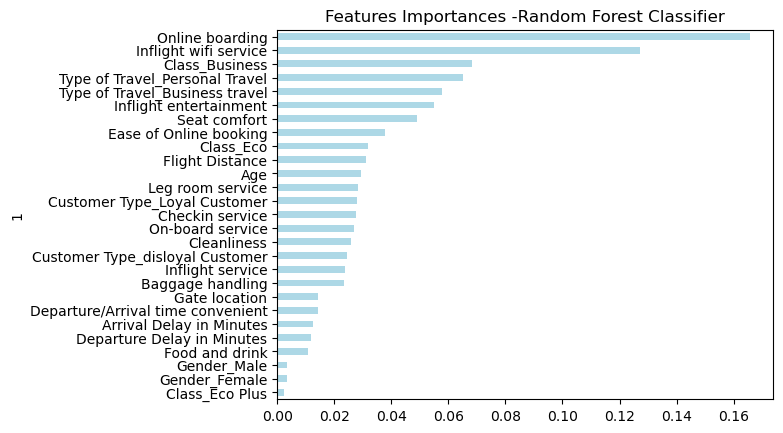

In [19]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_classifier.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh',color='lightblue', title= 'Features Importances -Random Forest Classifier', legend=False)
plt.xlabel('Importance')
plt.ylabel('Feature')